In [1]:
from google.colab import files
upload = files.upload()

Saving emotion.pickle to emotion.pickle


In [3]:
import pickle
from keras.utils import np_utils
from sklearn.utils import shuffle

#import du lieu
with open('emotion.pickle', 'rb') as f:
  (x, y) = pickle.load(f)


# chia du lieu train
x_train = x[:120]
y_train = y[:120]
#reshape

# ep kieu
x_train = x_train.astype('float32')
x_train /= 255
#encoding
y_train = np_utils.to_categorical(y_train, 4)
x_train, y_train = shuffle(x_train, y_train)
print(x_train.shape, y_train.shape)

(120, 150, 150, 3) (120, 4)


In [44]:
# tao model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers.pooling import MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (3,3), kernel_initializer= 'he_uniform', padding = 'same', input_shape= (150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform', padding= 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), kernel_initializer= 'he_uniform', padding= 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation= 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(128, activation= 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(128, activation= 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(128, activation= 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(128, activation= 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(4, activation= 'softmax'))
model.summary()
opt = SGD(lr = 0.01, momentum= 0.9)

#compile & train model
model.compile(optimizer= Adam(), loss= 'binary_crossentropy', metrics= 'accuracy')
history = model.fit(x_train, y_train, epochs= 20)


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 18, 18, 128)    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 32ms/step - loss: 5.0762 - accuracy: 0.2500
Epoch 2/20
4/4 [==============================] - 0s 31ms/step - loss: 3.2270 - accuracy: 0.3250
Epoch 3/20
4/4 [==============================] - 0s 23ms/step - loss: 1.9491 - accuracy: 0.3250
Epoch 4/20
4/4 [==============================] - 0s 25ms/step - loss: 0.9590 - accuracy: 0.4333
Epoch 5/20
4/4 [==============================] - 0s 24ms/step - loss: 0.8309 - accuracy: 0.4000
Epoch 6/20
4/4 [==============================] - 0s 24ms/step - loss: 0.6859 - accuracy: 0.3333
Epoch 7/20
4/4 [==============================] - 0s 24ms/step - loss: 0.5166 - accuracy: 0.4500
Epoch 8/20
4/4 [==============================] - 0s 24ms/step - loss: 0.4342 - accuracy: 0.6167
Epoch 9/20
4/4 [==============================] - 0s 23ms/step - loss: 0.3562 - accuracy: 0.7333
Epoch 10/20
4/4 [==============================] - 0s 22ms/step - loss: 0.3059 - accuracy: 0.7917
Epoch 11/20
4/4 [=======================

In [48]:
model.save('emotion01.h5')

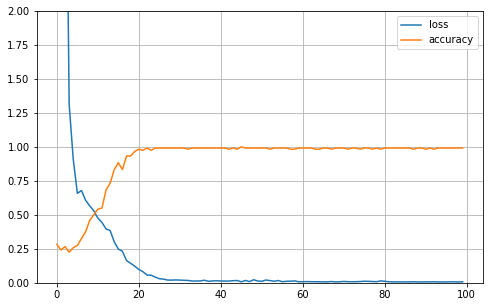

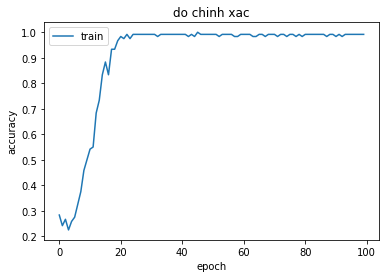

In [39]:
#ve do thi 
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

plt.plot(history.history['accuracy'])
plt.title('do chinh xac')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

Nguoi nay dang vui


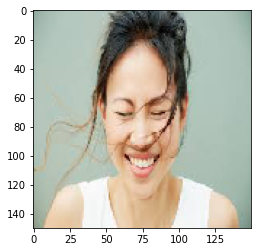

Nguoi nay dang ngac nhien


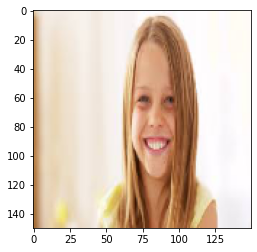

Nguoi nay dang ngac nhien


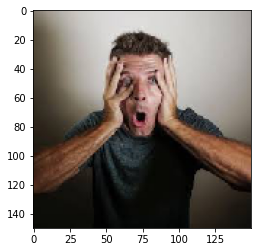

Nguoi nay dang ngac nhien


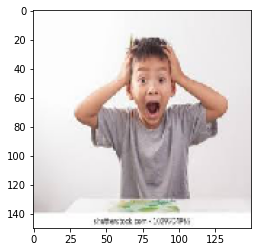

Nguoi nay dang so


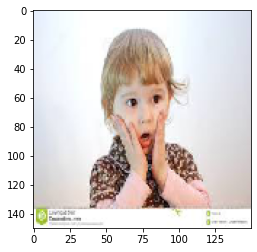

Nguoi nay dang so


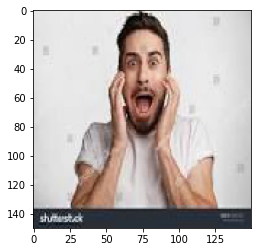

Nguoi nay dang so


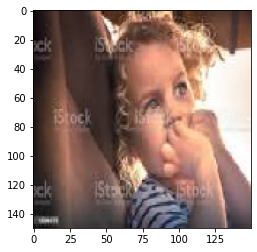

Nguoi nay dang ngac nhien


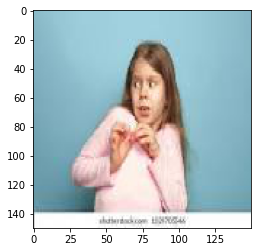

Nguoi nay dang buon


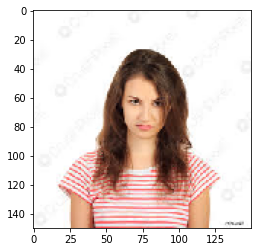

Nguoi nay dang vui


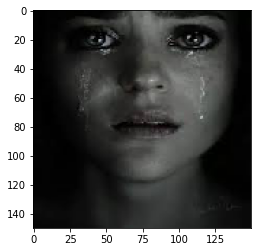

In [67]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
label = ['vui', 'buon', 'ngac nhien', 'so']
def predict(image):
  img = load_img(f'{image}.jfif', target_size = (150, 150))
  plt.imshow(img)
  img = img_to_array(img)
  img = img.reshape(1, 150, 150, 3)
  img = img.astype('float32')
  img /= 255
  pred = int(np.argmax(model.predict(img), axis = 1))
  for i in range(4):
    if i == pred:
      print(f'Nguoi nay dang {label[i]}')
  plt.show()

predict('vui1')
predict('vui2')
predict('nn3')
predict('nn6')
predict('so')
predict('so1')
predict('so2')
predict('so3')
predict('buon4')
predict('buon5')

In [66]:
from google.colab import files
upload = files.upload() 

Saving buon5.jfif to buon5.jfif
